# LIFE EXPECTANCY PREDICTION

## Libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno 
import sklearn as sk
pd.set_option('display.max_columns', 30)

## Data

In [ ]:
df1 = pd.read_csv('/home/davidkibet/Desktop/Life Expectancy ML/data/data_original/Life Expectancy Data.csv')
df2 = pd.read_excel('/home/davidkibet/Desktop/Life Expectancy ML/data/data_original/Country-Metadata.xlsx')
df3 = pd.read_csv('/home/davidkibet/Desktop/Life Expectancy ML/data/data_original/PopData.csv')
# df4 = pd.read_csv('/home/davidkibet/Desktop/Life Expectancy ML/data/data_original/Life_Expectancy_Dataset.csv')

## 1. Basic Cleaning

In [155]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

> There is a lot of missingness in df1

In [71]:
%%capture
df1.describe().T

In [156]:
%%capture
df2.info()

> df2: missing data in SpecialNotes

In [157]:
%%capture
df3.info()

> df3 has no missing data

## 2. Missingness

#### a. Missing matrix

- I use the missingno library to visualize missing data throughout my columns

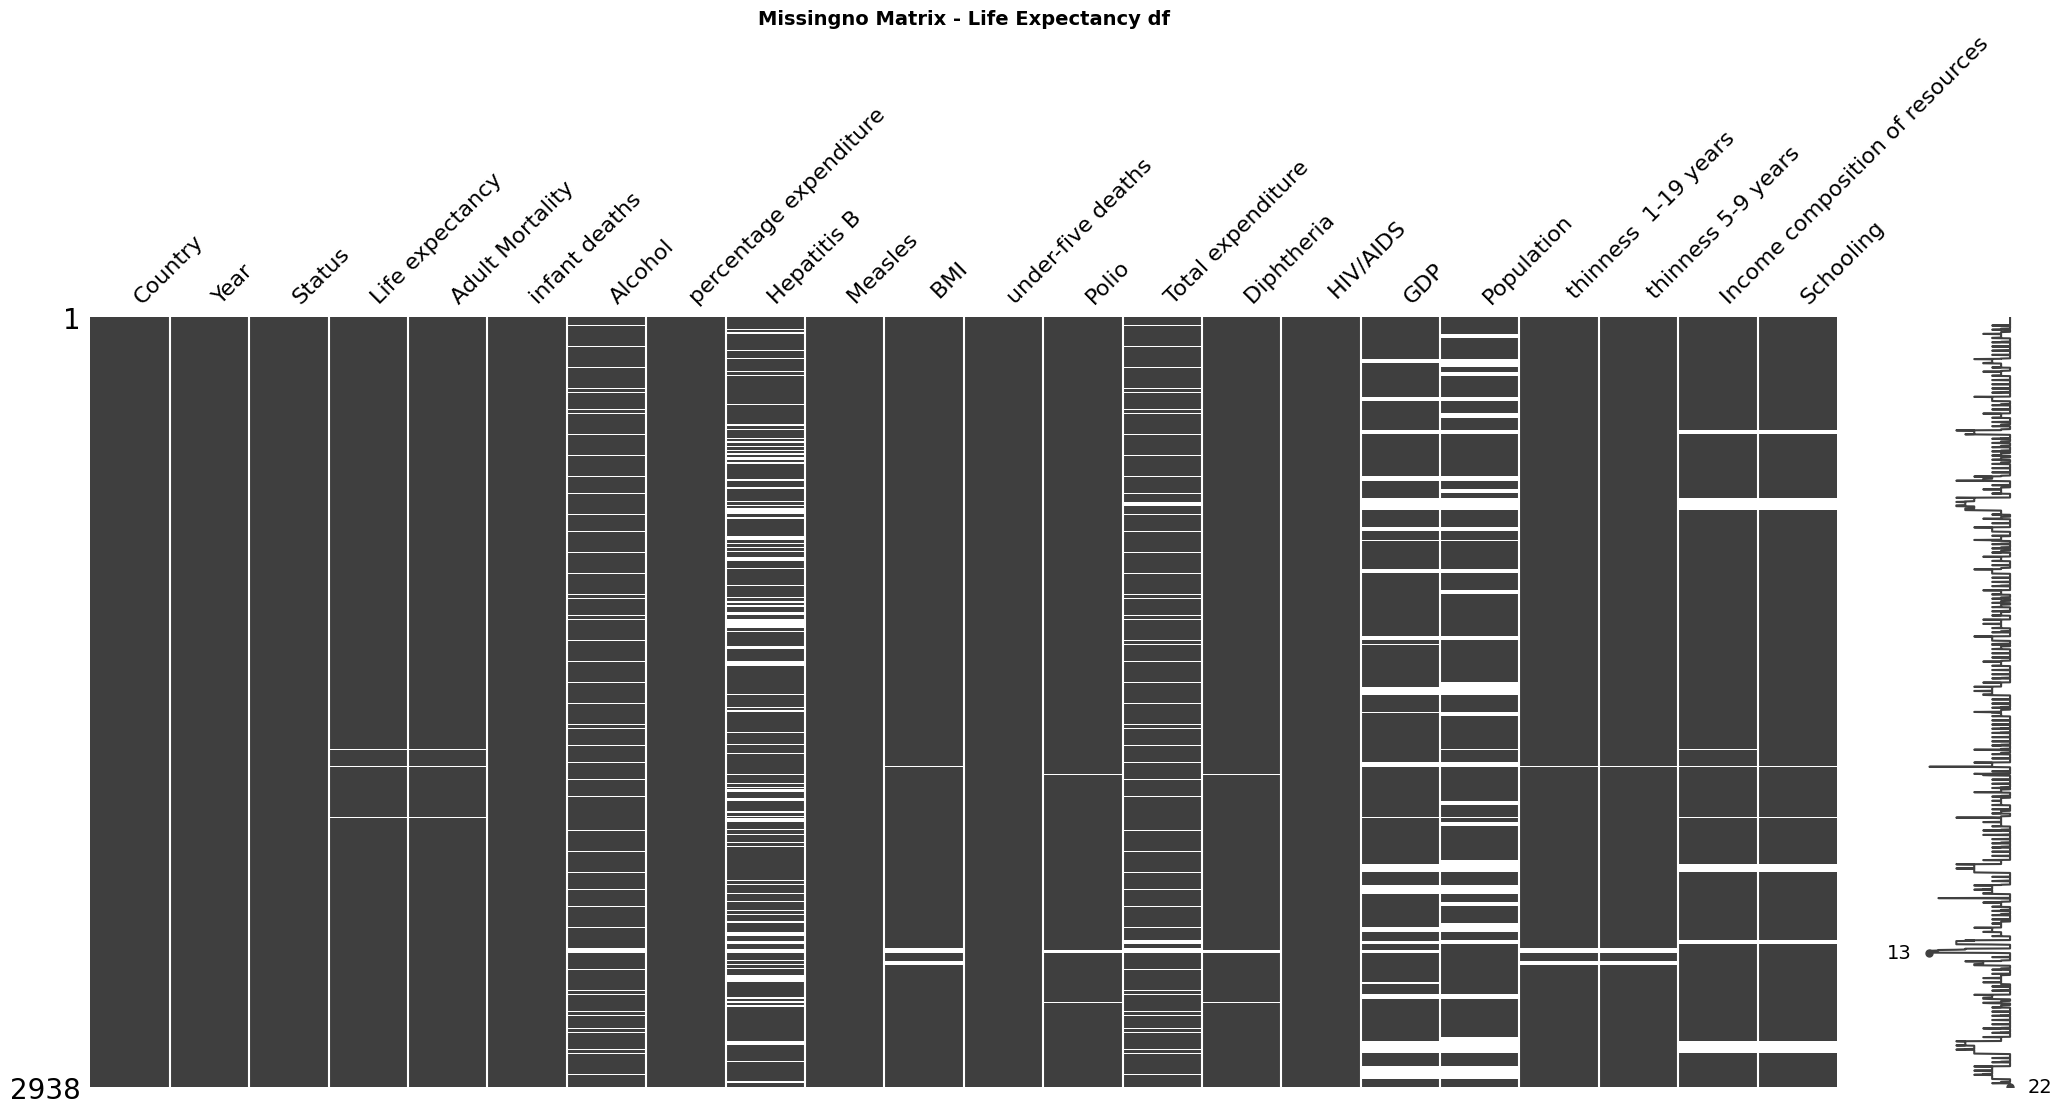

In [ ]:
msno.matrix(df1)
plt.title('Missingno Matrix - Life Expectancy df', fontweight='bold', fontsize=14)
plt.show()

> - Life expectancy and Adult Mortality might be Missing Not At Random (MNAR)
> - Alcohol MCAR
> - Hepatitis B - MCAR
> - BMI and Polio - MAR
> - Polio and diptheris - MNAR
> - Total Expenditure - MCAR
> - GDP and Population - MNAR
> - Thinness 1-19 and 5-9 years - MNAR
> - Income composition of resources and Schooling

### b. Missingno Heatmap

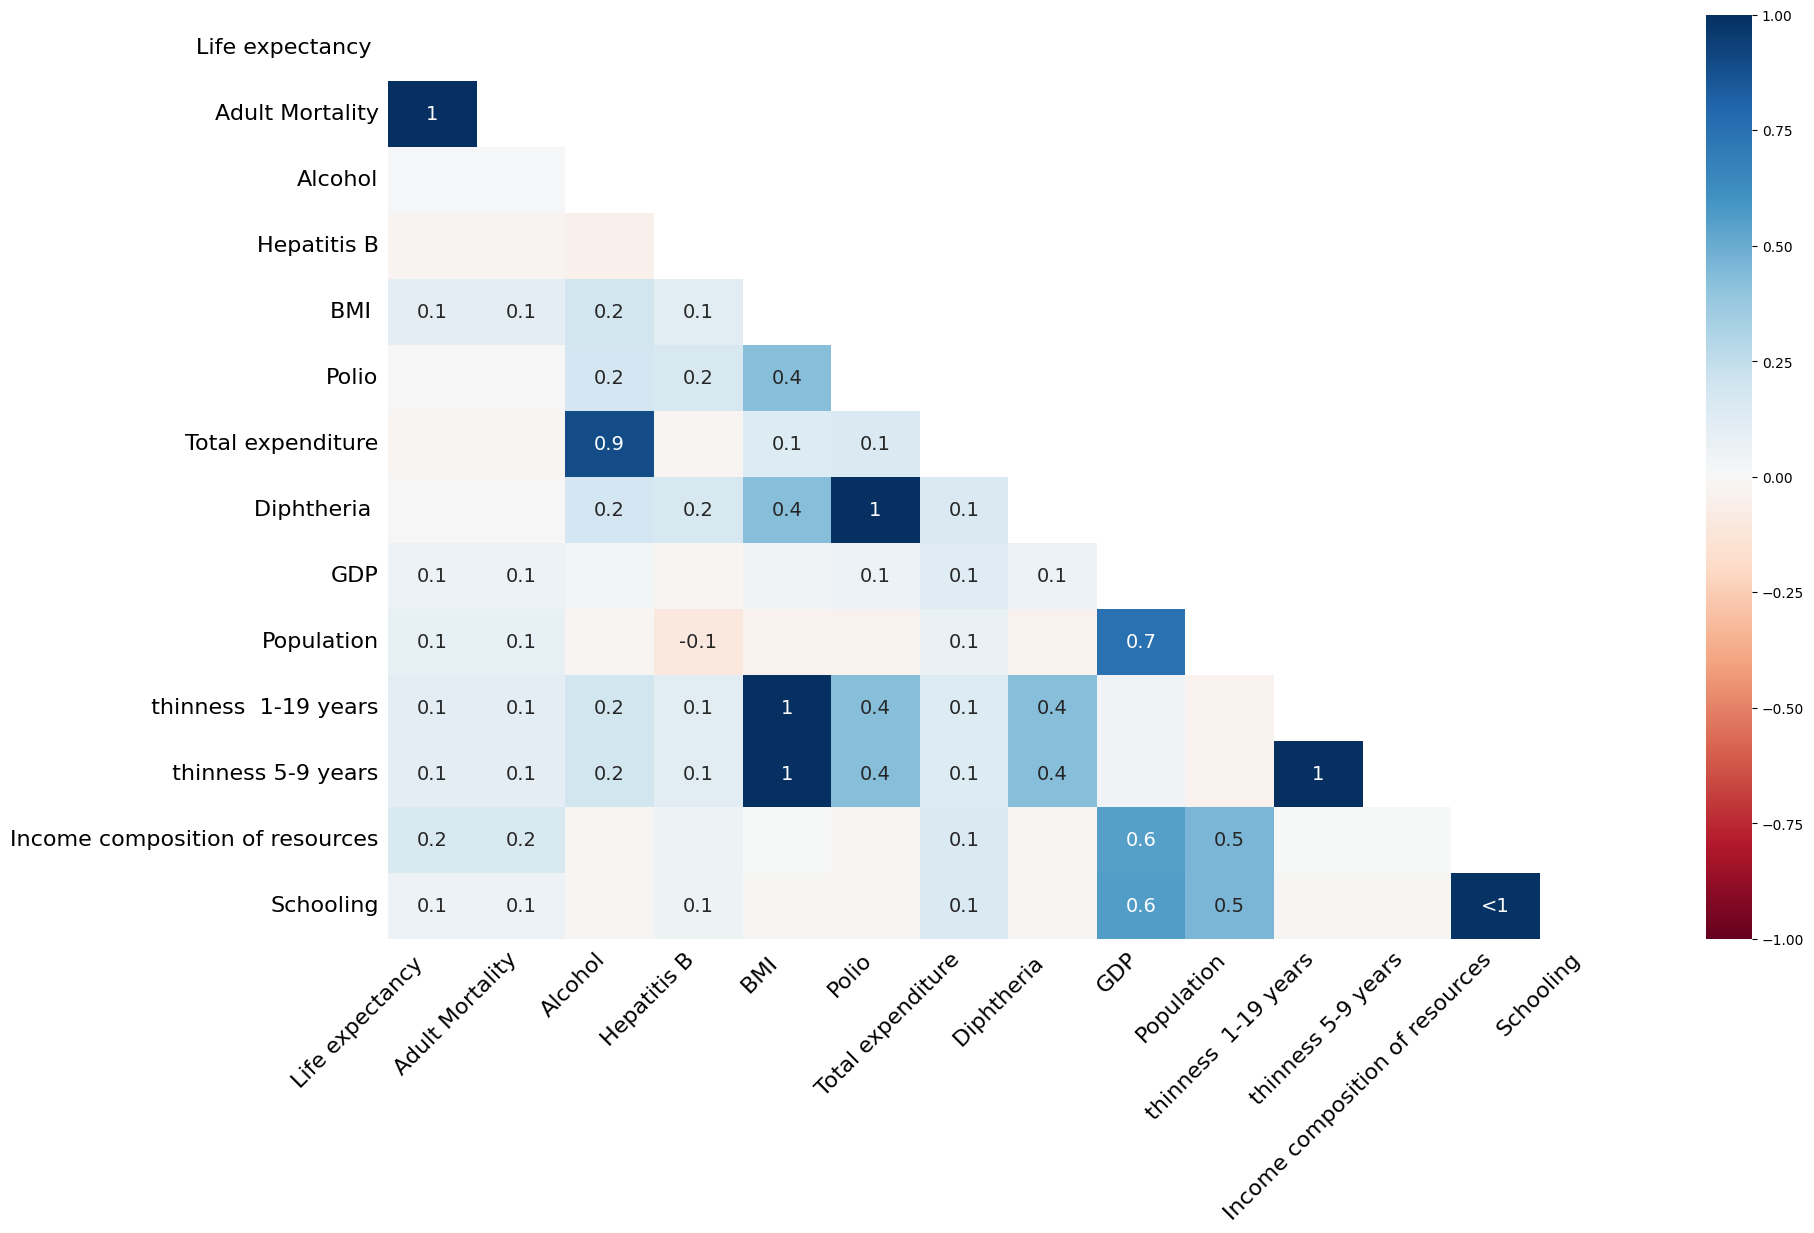

In [85]:
msno.heatmap(df1)
plt.show()

> - Total Expenditure and alcohol
> - Adult Mortality and Life Expectancy
> - Diptheria and Polio
> - Thinness 1-19 and 5-9 years
> - GDP and schooling
> - GDP and income composition of resources

- From this data there is apparent correlation in missingness between the different columns
- Meaning, I have to take into consideration other columns while imputing the missing data

### c. Dendrogram

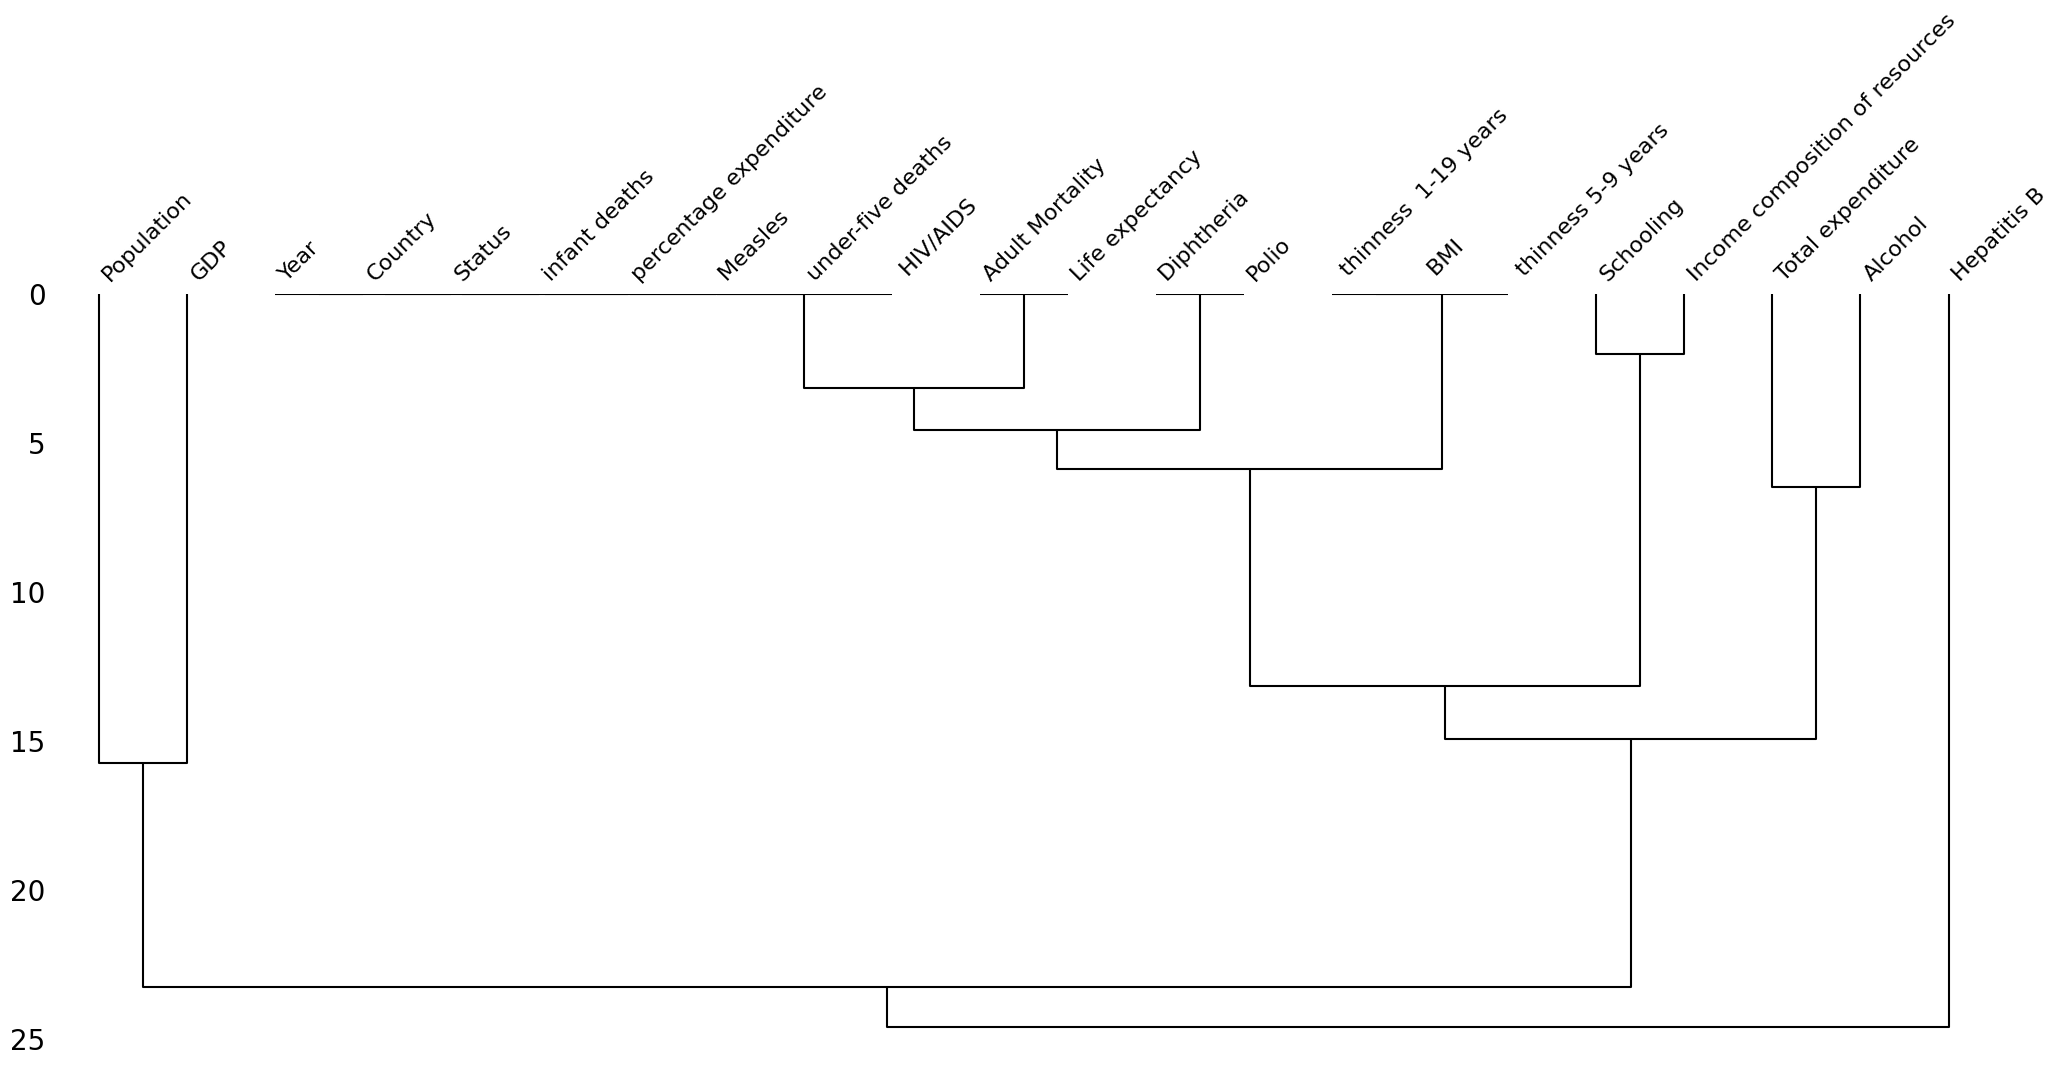

In [86]:
msno.dendrogram(df1)
plt.show()

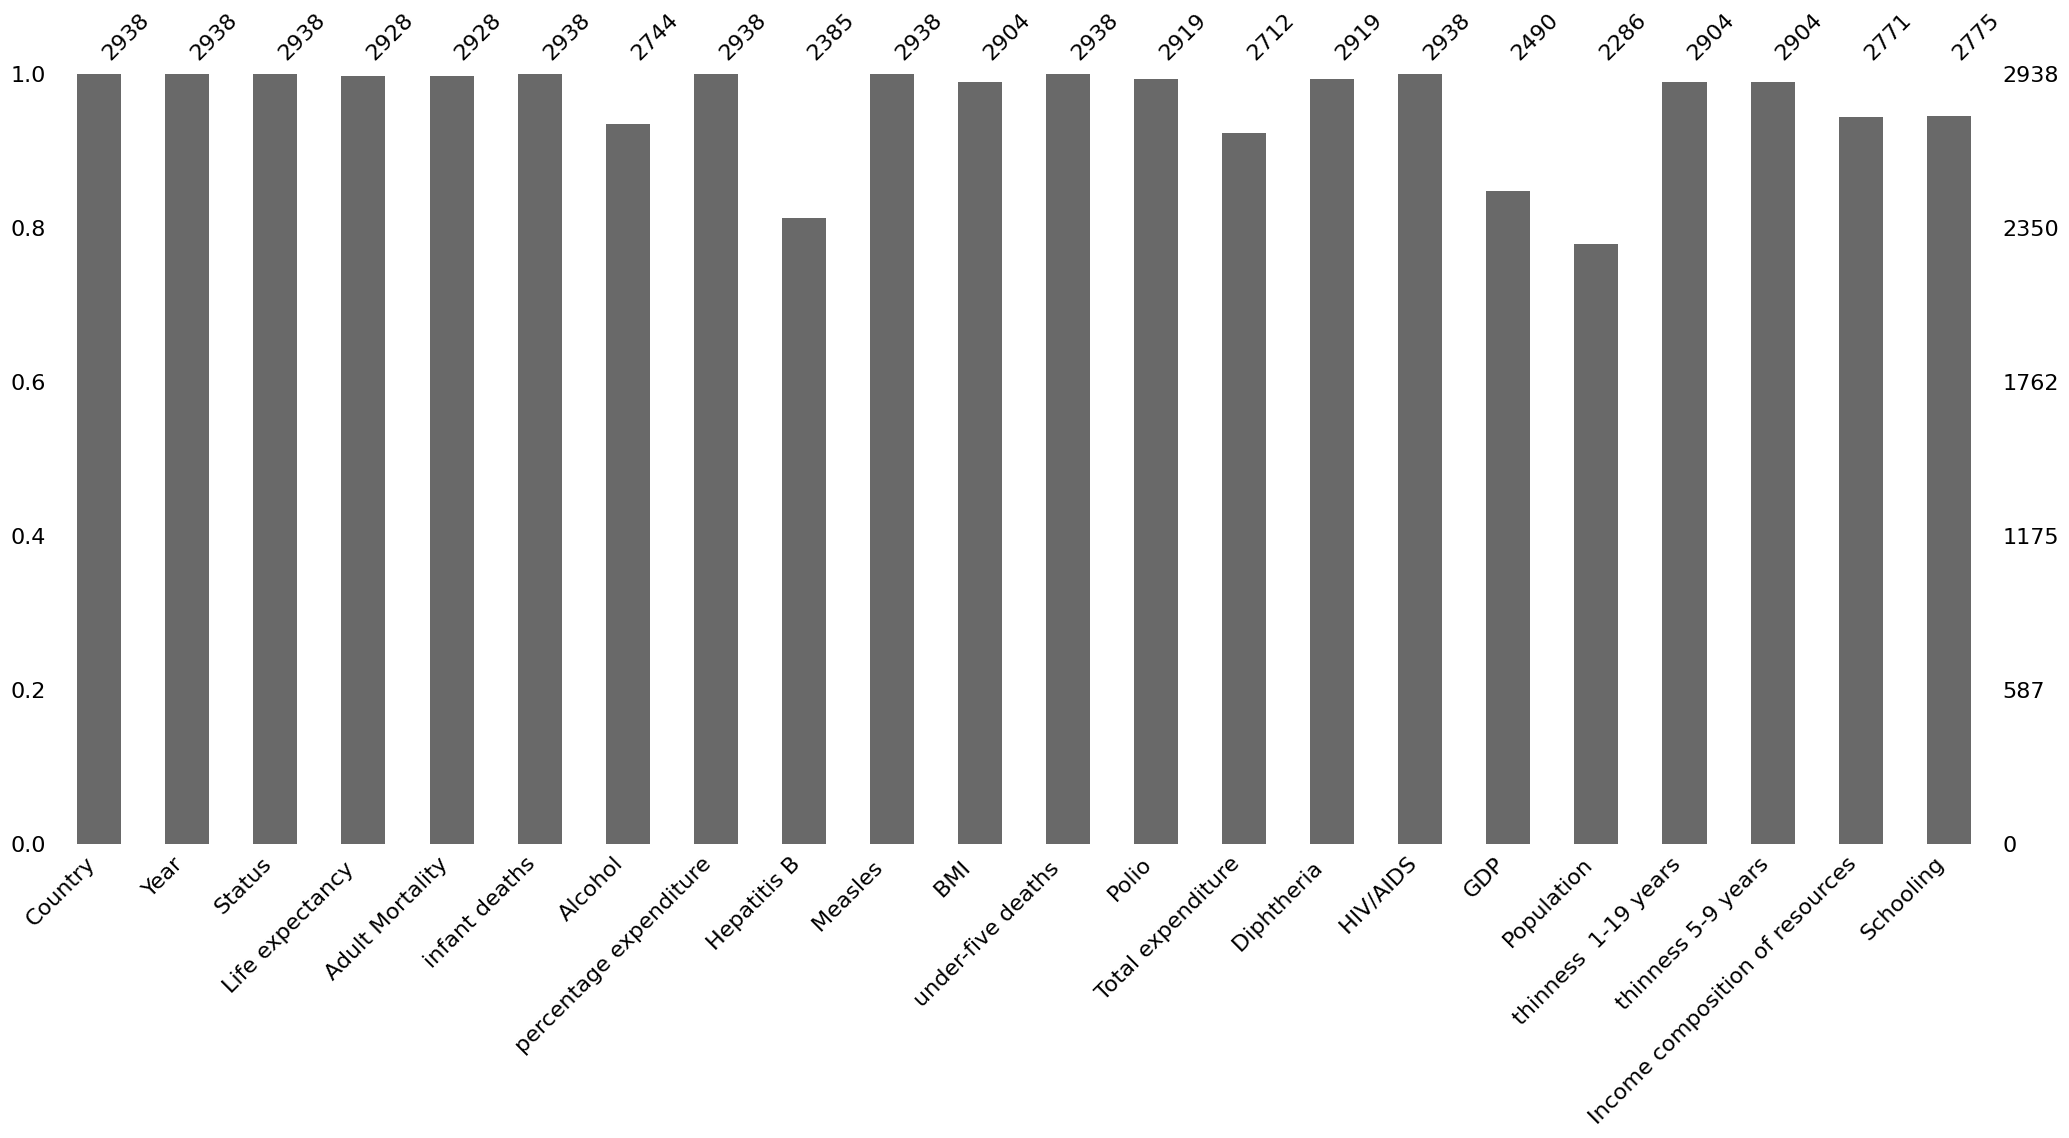

In [87]:
msno.bar(df1)
plt.show()

## 3. Imputation - MICE

**Mulitple Imputation by Chained Equations (MICE)**

- Because majority of the data is MAR and MCAR I will use MICE

In [89]:
from miceforest import ImputationKernel

In [90]:
mice_kernel = ImputationKernel(
    data = df1.drop(columns=['Country','Status']),
    save_all_iterations_data=True,
    random_state=42
)

In [91]:
mice_kernel.mice(5)
mice_imputation = mice_kernel.complete_data()
mice_imputation.head()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [122]:
%%capture
mice_imputation.info()

In [93]:
final_df = pd.concat([df1[['Country', 'Status']], mice_imputation], axis=1)


In [94]:
final_df.head()

,Country,Status,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,Developing,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,Developing,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,Developing,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,Developing,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,Developing,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


## 4. Visualising Imputed vs the Original Data

- Create a new variable called missing_cols to store columns with previously missing data

In [97]:
missing_cols = df1.columns[df1.isnull().any()]
print(missing_cols)


Index(['Life expectancy ', 'Adult Mortality', 'Alcohol', 'Hepatitis B',
       ' BMI ', 'Polio', 'Total expenditure', 'Diphtheria ', 'GDP',
       'Population', ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')


In [125]:
# reinitialize the missing columns
cols = ['Life expectancy ', 'Adult Mortality', 'Alcohol', 'Hepatitis B',
       ' BMI ', 'Polio', 'Total expenditure', 'Diphtheria ', 'GDP',
       'Population', ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling']

#### a. KDE Plot 

Parameters:
- original_df: DataFrame before imputation
- imputed_df: DataFrame after imputation
- cols: List of column names to compare
- rows: Number of rows in the subplot grid (default: 4)
- cols_per_row: Number of columns in the subplot grid (default: 4)
- figsize: Tuple specifying figure size (default: (10, 8))

In [152]:
def compare_kde_imputation(original_df, imputed_df, cols, rows=4, cols_per_row=4, figsize=(10, 8)):
    fig, ax = plt.subplots(rows, cols_per_row, figsize=figsize, dpi=300)
    ax = ax.flatten()  # Flatten for easy iteration

    # Define consistent colors for Original and Imputed data
    original_color = 'blue'
    imputed_color = 'red'

    # Create proxy artists for the global legend
    from matplotlib.lines import Line2D
    original_patch = Line2D([0], [0], color=original_color, lw=2, label='Original')
    imputed_patch = Line2D([0], [0], color=imputed_color, lw=2, linestyle='--', label='Imputed')

    for i, col in enumerate(cols):
        if i < len(ax):  # Ensure we don't exceed available subplots
            # Plot KDE for Original data
            sns.kdeplot(
                original_df[col].dropna(), 
                fill=True, 
                ax=ax[i], 
                color=original_color
            )
            # Plot KDE for Imputed data
            sns.kdeplot(
                imputed_df[col], 
                fill=True, 
                ax=ax[i], 
                color=imputed_color, 
                linestyle="dashed"
            )
            # Customize subplot appearance
            ax[i].set_title(col, fontsize=10)  # Smaller title font
            ax[i].tick_params(axis='both', labelsize=8)  # Adjust tick label size
            ax[i].grid(True, linestyle='--', alpha=0.6)  # Add gridlines

    # Hide unused subplots
    for j in range(i + 1, len(ax)):
        fig.delaxes(ax[j])

    # Add a global title
    fig.suptitle("Comparison of Original vs. Imputed Data - KDE Plot", fontsize=14, y=1.02)

    # Add a single global legend
    fig.legend(handles=[original_patch, imputed_patch], loc='upper center', bbox_to_anchor=(0.5, -0.05),
               ncol=2, fontsize=10, frameon=False)

    # Adjust layout to prevent overlapping
    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave space for the global legend
    plt.show()

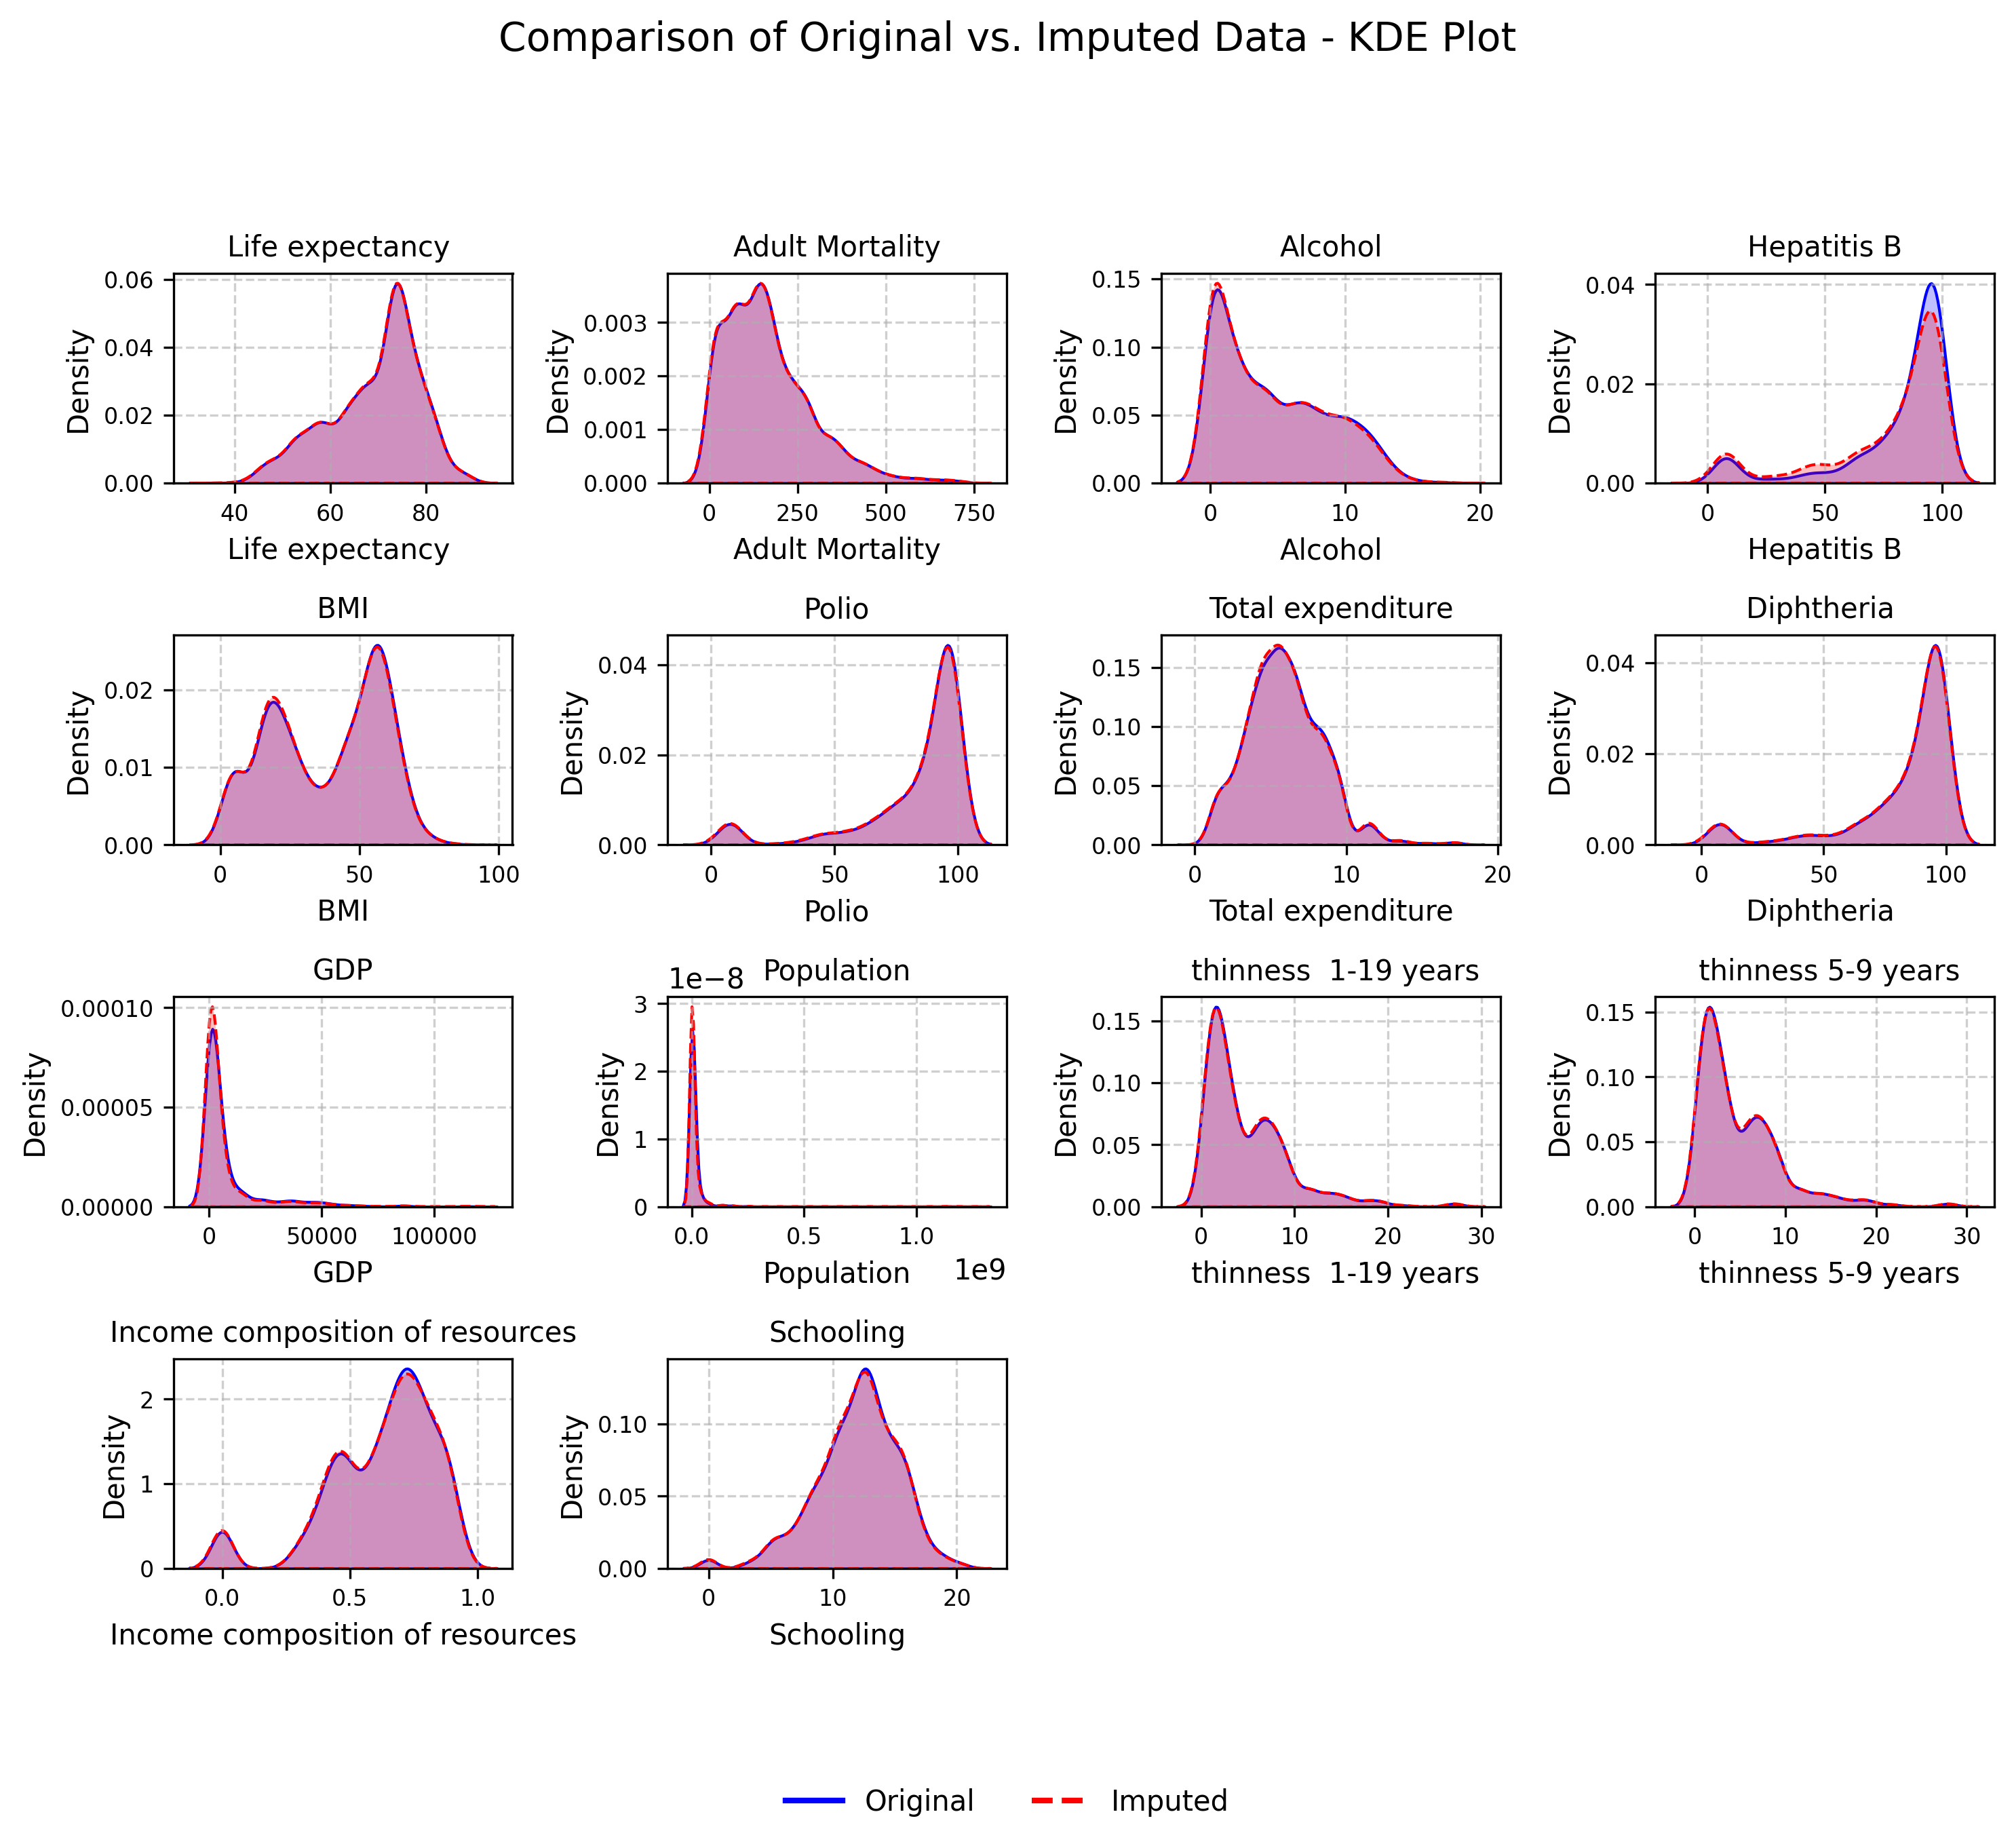

In [153]:
compare_kde_imputation(df1, final_df, cols)

- The imputation is satisfactory as it did not affect the initial distribution of our data.
- The is however observable change in the peaks and troughs of Hepatitis B, GDP and population.

#### b. Boxplots

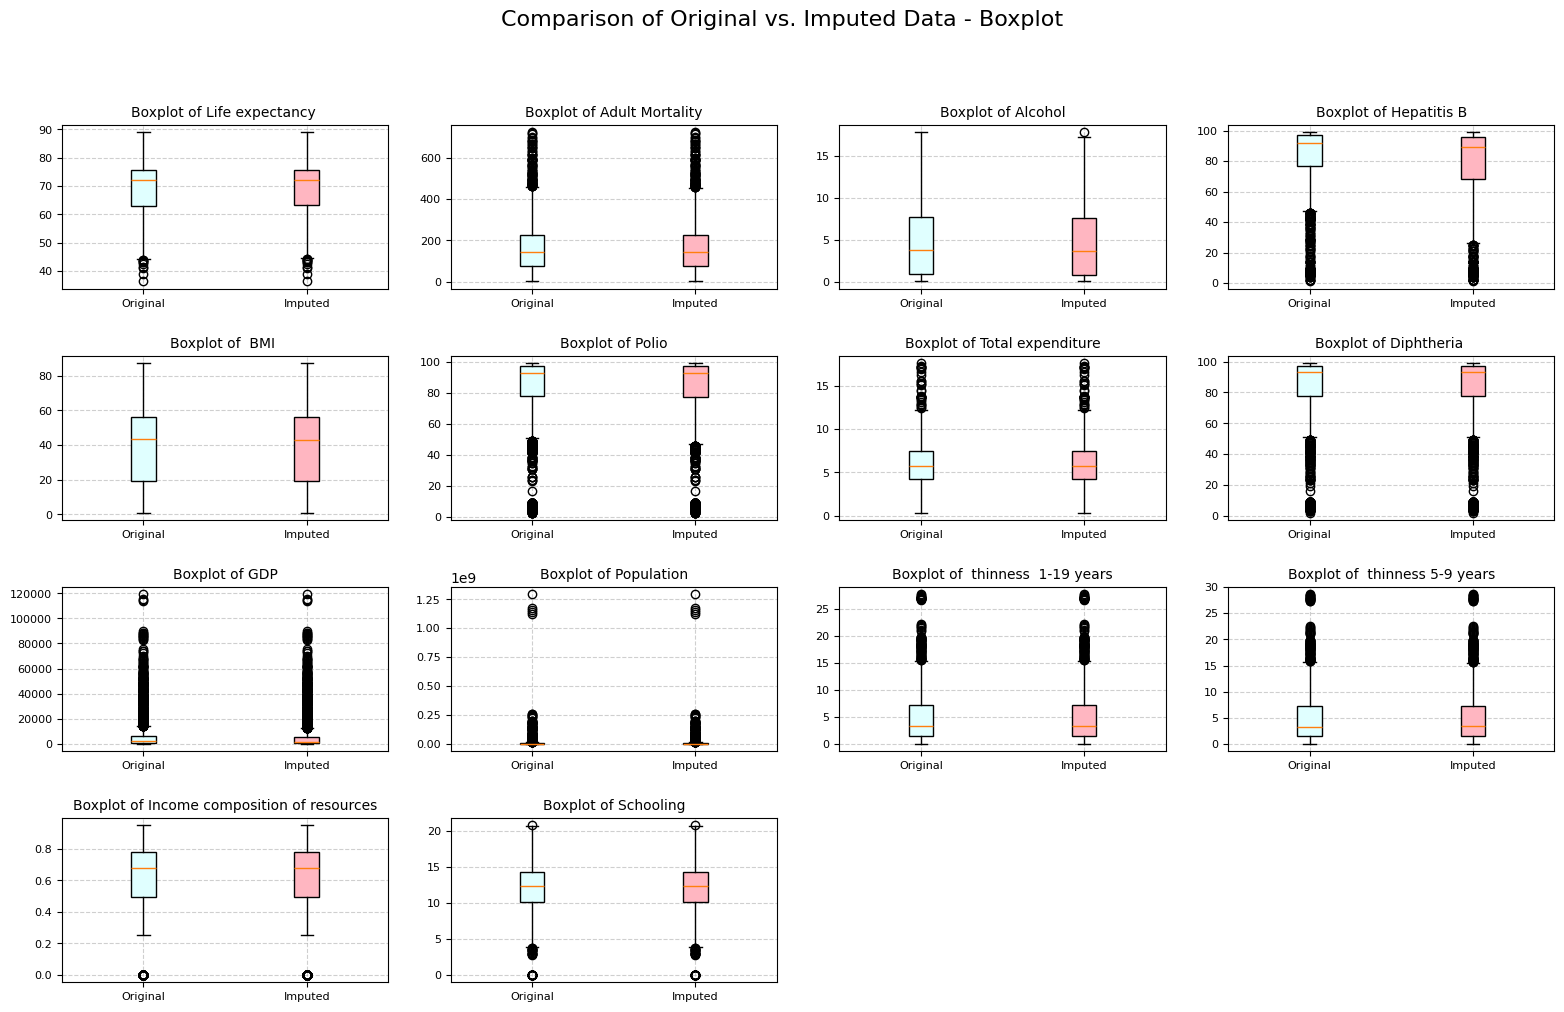

In [136]:
fig, ax = plt.subplots(4, 4, figsize=(16, 10))
ax = ax.flatten()  # Flatten to easily index subplots

colors = ['lightcyan', 'lightpink']  # Define colors for Original and Imputed

for i, col in enumerate(cols):
    if i < len(ax):  # Ensure we don't exceed available subplots
        bplot = ax[i].boxplot(
            [df1[col].dropna(), final_df[col]], 
            patch_artist=True, 
            tick_labels=["Original", "Imputed"]
        )
        # Apply colors to boxes
        for patch, color in zip(bplot['boxes'], colors):
            patch.set_facecolor(color)
        ax[i].set_title(f"Boxplot of {col}", fontsize=10)  # Smaller title font
        ax[i].tick_params(axis='both', labelsize=8)  # Adjust tick label size
        ax[i].grid(True, linestyle='--', alpha=0.6)  # Add gridlines

# Hide unused subplots (if cols has fewer than 16 features)
for j in range(i + 1, len(ax)):
    fig.delaxes(ax[j])

# Add a global title
fig.suptitle("Comparison of Original vs. Imputed Data - Boxplot", fontsize=16, y=1.02)

# Adjust layout
plt.tight_layout(pad=2.0)
plt.show()

#### c. Correlation Heatmap

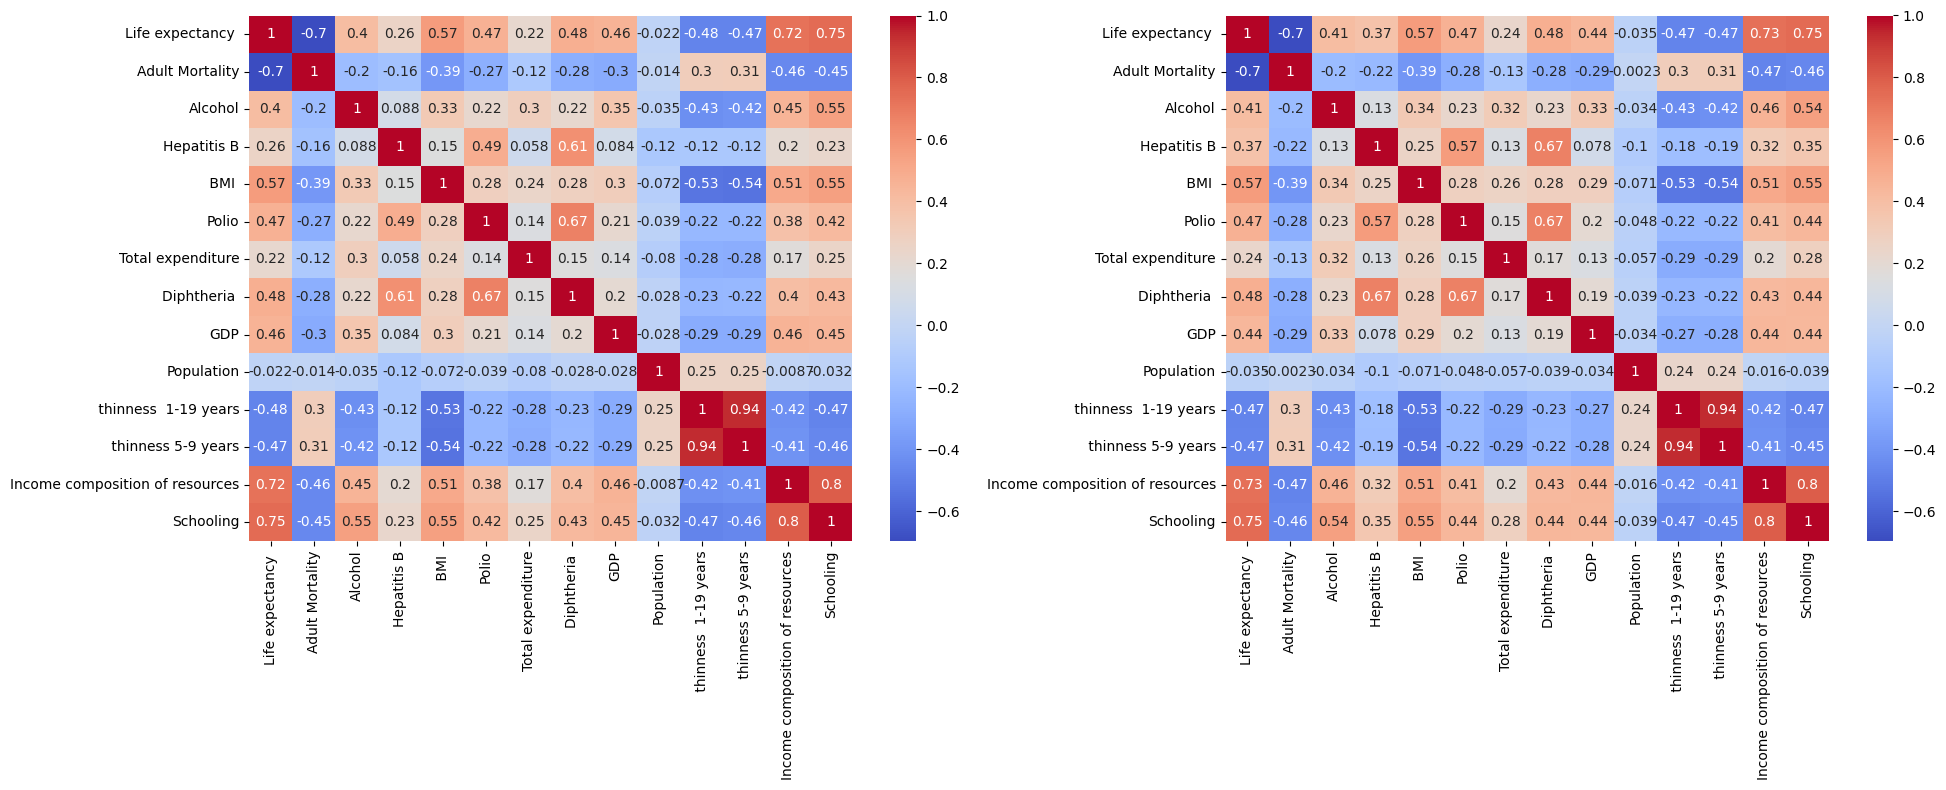

In [109]:
corr1 = df1[cols].corr()
corr2 = final_df[cols].corr()

fig, ax = plt.subplots(1,2, figsize=(20,8))
sns.heatmap(corr1, cmap='coolwarm', annot=True, ax=ax[0])
sns.heatmap(corr2, cmap='coolwarm', annot=True, ax=ax[1])
plt.tight_layout()
plt.show()

## 5. Tests to show the accuracy of our imputed data

### a. Kolmogorov-Smirnov (KS) Test

- Compares cumulative distributions of two datasets
- Null hypothesis (H₀): The two distributions are the same
- If p-value < 0.05, imputation significantly changed the distribution

In [106]:
from scipy.stats import ks_2samp

for col in cols:
    stat, p_value = ks_2samp(df1[col].dropna(), final_df[col])
    print(f"{col}: KS Test p-value = {p_value:.4f}")


Life expectancy : KS Test p-value = 1.0000
Adult Mortality: KS Test p-value = 1.0000
Alcohol: KS Test p-value = 1.0000
Hepatitis B: KS Test p-value = 0.0000
 BMI : KS Test p-value = 1.0000
Polio: KS Test p-value = 1.0000
Total expenditure: KS Test p-value = 1.0000
Diphtheria : KS Test p-value = 1.0000
GDP: KS Test p-value = 0.0712
Population: KS Test p-value = 0.9886
 thinness  1-19 years: KS Test p-value = 1.0000
 thinness 5-9 years: KS Test p-value = 1.0000
Income composition of resources: KS Test p-value = 1.0000
Schooling: KS Test p-value = 1.0000


> p > 0.05 → No significant difference (good imputation)  
> p < 0.05 → Distributions are different (bad imputation)

- In this case there is no significant difference

### b. Jensen Shannon Divergence

- Measures the difference between probability distributions
- Lower values (~0) mean similar distributions, higher values (~1) indicate large differences

In [107]:
from scipy.spatial.distance import jensenshannon
import numpy as np

for col in cols:
    p = np.histogram(df1[col].dropna(), bins=30, density=True)[0]
    q = np.histogram(final_df[col], bins=30, density=True)[0]
    jsd = jensenshannon(p, q)
    print(f"{col}: JSD = {jsd:.4f}")


Life expectancy : JSD = 0.0018
Adult Mortality: JSD = 0.0013
Alcohol: JSD = 0.0107
Hepatitis B: JSD = 0.0700
 BMI : JSD = 0.0069
Polio: JSD = 0.0049
Total expenditure: JSD = 0.0101
Diphtheria : JSD = 0.0039
GDP: JSD = 0.0271
Population: JSD = 0.0144
 thinness  1-19 years: JSD = 0.0055
 thinness 5-9 years: JSD = 0.0062
Income composition of resources: JSD = 0.0121
Schooling: JSD = 0.0099


> JSD ≈ 0 → Distributions are very similar (good)    
> JSD > 0.2 → Potential imputation issues 
- In this case the divergence for all the columns is approx zero, hence good.

- Based on the above analysis, I'm confident that MICE imputation did well. I will continue with my analysis.

## 6. Save the final imputed df

- To csv

In [112]:
final_df.to_csv('/home/davidkibet/Desktop/Life Expectancy ML/data/data_imputed/final_df.csv')

- For easier retrieval

In [154]:
# In first notebook
%store final_df
# I wil save it this way for easier retrieval in the subsequent notebooks

Stored 'final_df' (DataFrame)
